In [31]:
import pandas as pd

# Load the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)

# Display the first few rows of the dataset
print(data.head())


     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


In [32]:
# Features (All columns except the last one)
X = data.iloc[:, :-1]

# Target (Last column - 1 indicates spam, 0 indicates non-spam)
y = data.iloc[:, -1]


In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression

# Build and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [37]:
import numpy as np

# Manually calculate confusion matrix
tp = np.sum((y_test == 1) & (y_pred == 1))  # True Positives
tn = np.sum((y_test == 0) & (y_pred == 0))  # True Negatives
fp = np.sum((y_test == 0) & (y_pred == 1))  # False Positives (Type I Error)
fn = np.sum((y_test == 1) & (y_pred == 0))  # False Negatives (Type II Error)

# Manual Confusion Matrix
conf_matrix = np.array([[tn, fp],
                                [fn, tp]])

print("Confusion Matrix:")
print(conf_matrix)

# Type I and Type II errors
type_i_error = fp  # False Positives
type_ii_error = fn  # False Negatives

print(f"Type I Error (False Positives): {type_i_error}")
print(f"Type II Error (False Negatives): {type_ii_error}")

Confusion Matrix:
[[769  35]
 [ 71 506]]
Type I Error (False Positives): 35
Type II Error (False Negatives): 71


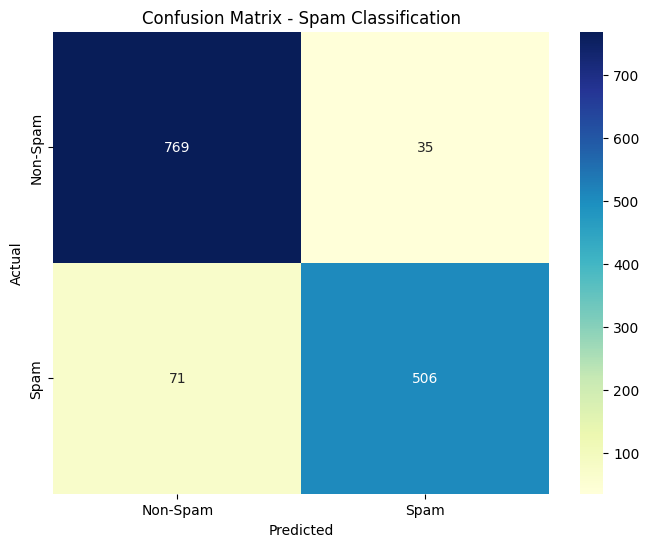

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix - Spam Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

*Which type of error (Type I or Type II) would cause more harm in the context of spam email classification, and why?*

**Solution**: In most cases, a Type I error (false positive) might be more harmful because an important non-spam email could be classified as spam, causing the user to miss it. This could result in missing critical emails such as job offers or important business communications. On the other hand, a Type II error (false negative), where a spam email is classified as non-spam, could clutter the inbox with unwanted emails but is typically less critical.



*How would adjusting the classification threshold impact the number of Type I and Type II errors?*

**Solution**: Adjusting the threshold for classifying an email as spam will change the balance between Type I and Type II errors. Lowering the threshold will increase the sensitivity, reducing Type II errors (spam classified as non-spam) but increasing Type I errors (non-spam classified as spam). Conversely, raising the threshold will reduce Type I errors but increase Type II errors.